In [2]:

import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical


Base Model for cifar100

In [3]:
(X_train,y_train),(X_test,y_test)=cifar100.load_data()

X_train=X_train.reshape((-1,32*32*3))
X_test=X_test.reshape((-1,32*32*3))

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

#preprocess
X_train=X_train/255.0
X_test=X_test/255.0

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

169009152/169001437 [==============================] - 6s 0us/step


In [4]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(50000, 3072) (50000, 100)
(10000, 3072) (10000, 100)


In [5]:
##build model
initializer=tf.keras.initializers.glorot_normal()

model=Sequential()
model.add(Dense(100,input_dim=3072,activation='relu',kernel_initializer=initializer,bias_initializer=initializer))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(124,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 124)               31868     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               12500     
Total params: 443,316
Trainable params: 443,316
Non-trainable params: 0
_________________________________________________________________


In [7]:
##compile model
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='sgd')

In [8]:
es=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss',restore_best_weights=True)
#mc=tf.keras.callbacks.ModelCheckpoint(filepath='cifar10-{epoch:02d}.hdf5',monitor='val_acc', verbose=1,save_best_only=True)
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1,callbacks=[es])

Epoch 1/20
1407/1407 [==============================] - 7s 5ms/step - loss: 4.4973 - accuracy: 0.0285 - val_loss: 4.3084 - val_accuracy: 0.0510
Epoch 2/20
1407/1407 [==============================] - 7s 5ms/step - loss: 4.0974 - accuracy: 0.0721 - val_loss: 3.9896 - val_accuracy: 0.0900
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 3.8885 - accuracy: 0.1010 - val_loss: 3.8821 - val_accuracy: 0.0998
Epoch 4/20
1407/1407 [==============================] - 6s 4ms/step - loss: 3.7657 - accuracy: 0.1248 - val_loss: 3.9179 - val_accuracy: 0.1060
Epoch 5/20
1407/1407 [==============================] - 6s 5ms/step - loss: 3.6757 - accuracy: 0.1398 - val_loss: 3.7681 - val_accuracy: 0.1258
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 3.5996 - accuracy: 0.1528 - val_loss: 3.6481 - val_accuracy: 0.1434
Epoch 7/20
1407/1407 [==============================] - 6s 5ms/step - loss: 3.5316 - accuracy: 0.1658 - val_loss: 3.6810 - val_accuracy:

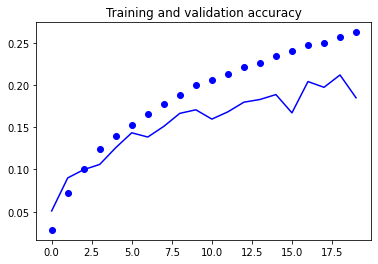

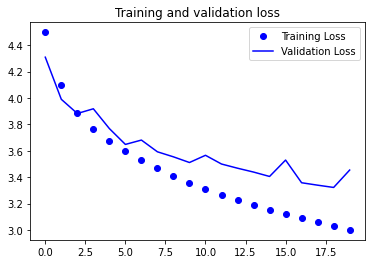

In [9]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Base Model for mnist

In [10]:
from tensorflow.keras.datasets import mnist

In [11]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=X_train.reshape((-1,28*28))
X_test=X_test.reshape((-1,28*28))

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

#preprocess
X_train=X_train/255.0
X_test=X_test/255.0

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

11493376/11490434 [==============================] - 0s 0us/step


In [12]:
X_train.shape,y_train.shape


((60000, 784), (60000, 10))

In [13]:
##build model
initializer=tf.keras.initializers.glorot_normal()

model=Sequential()
model.add(Dense(100,input_dim=784,activation='relu',kernel_initializer=initializer,bias_initializer=initializer))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(124,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               25856     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 124)               31868     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1250      
Total params: 203,266
Trainable params: 203,266
Non-trainable params: 0
_________________________________________________________________


In [14]:
##compile model
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='sgd')

In [15]:
es=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss',restore_best_weights=True)
#mc=tf.keras.callbacks.ModelCheckpoint(filepath='cifar10-{epoch:02d}.hdf5',monitor='val_acc', verbose=1,save_best_only=True)
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1,callbacks=[es])

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7123 - accuracy: 0.7962 - val_loss: 0.2683 - val_accuracy: 0.9280
Epoch 2/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2782 - accuracy: 0.9181 - val_loss: 0.2158 - val_accuracy: 0.9340
Epoch 3/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2145 - accuracy: 0.9369 - val_loss: 0.1660 - val_accuracy: 0.9540
Epoch 4/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1744 - accuracy: 0.9483 - val_loss: 0.1629 - val_accuracy: 0.9542
Epoch 5/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1466 - accuracy: 0.9560 - val_loss: 0.1366 - val_accuracy: 0.9617
Epoch 6/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1253 - accuracy: 0.9616 - val_loss: 0.1085 - val_accuracy: 0.9703
Epoch 7/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1092 - accuracy: 0.9675 - val_loss: 0.1048 - val_accuracy:

In [16]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.0878 - accuracy: 0.9738


[0.08780819922685623, 0.973800003528595]

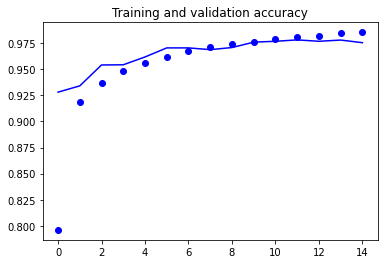

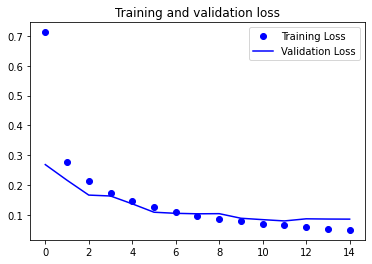

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Base Model for fashion-mnist

In [18]:
from tensorflow.keras.datasets import fashion_mnist

In [19]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=X_train.reshape((-1,28*28))
X_test=X_test.reshape((-1,28*28))

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

#preprocess
X_train=X_train/255.0
X_test=X_test/255.0

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [20]:
##build model
initializer=tf.keras.initializers.glorot_normal()

model=Sequential()
model.add(Dense(100,input_dim=784,activation='relu',kernel_initializer=initializer,bias_initializer=initializer))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(124,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               25856     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 124)               31868     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1250      
Total params: 203,266
Trainable params: 203,266
Non-trainable params: 0
_________________________________________________________________


In [21]:

##compile model
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='sgd')

In [22]:
es=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss',restore_best_weights=True)
#mc=tf.keras.callbacks.ModelCheckpoint(filepath='cifar10-{epoch:02d}.hdf5',monitor='val_acc', verbose=1,save_best_only=True)
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1,callbacks=[es])

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7648 - accuracy: 0.7926 - val_loss: 0.2524 - val_accuracy: 0.9255
Epoch 2/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2669 - accuracy: 0.9216 - val_loss: 0.1925 - val_accuracy: 0.9475
Epoch 3/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2024 - accuracy: 0.9408 - val_loss: 0.1606 - val_accuracy: 0.9583
Epoch 4/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1638 - accuracy: 0.9516 - val_loss: 0.1403 - val_accuracy: 0.9620
Epoch 5/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1394 - accuracy: 0.9586 - val_loss: 0.1210 - val_accuracy: 0.9670
Epoch 6/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1213 - accuracy: 0.9643 - val_loss: 0.1226 - val_accuracy: 0.9667
Epoch 7/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1072 - accuracy: 0.9679 - val_loss: 0.1028 - val_accuracy:

In [23]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0795 - accuracy: 0.9746


[0.07948038727045059, 0.9746000170707703]

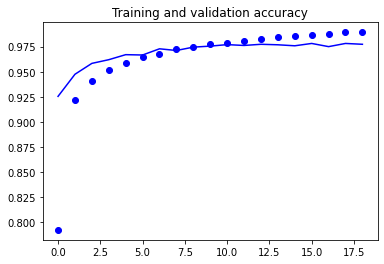

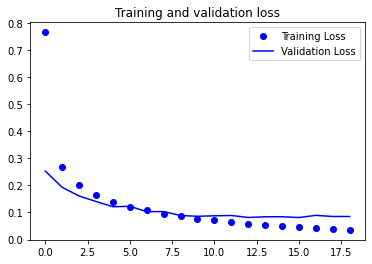

In [24]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()